# assignment 7 - exchange flow

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

In [2]:
H =10 #m
b =100 #m
q = 1 #m2/s
f = 0.002
g_ = 7.9/100 #m/s^2

In [3]:
#composite froude number at the centre of the channel
Go2 = (16*q**2)/(g_*H**3)
Go2

0.20253164556962025

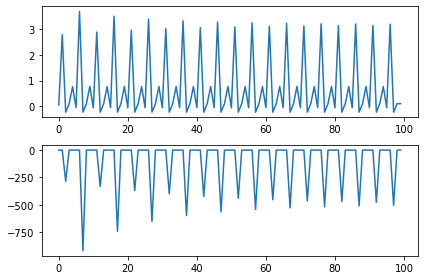

In [4]:
#iterate to solve for Ne and Go2
N = np.zeros(100)
G = np.zeros(100)
G[0]=Go2
L=1000

for i in range(len(N)-1):
    N[i]=(9/8)*(f/H)*(G[i]/(1-G[i]))*L
    #G[i+1]=((1-4*N[i]**2)**3)/((1+12*N[i]**2)**2)
    G[i+1]=16*((1/2-N[i])**3 * (1/2+N[i])**3)/((1/2-N[i])**3 + (1/2+N[i])**3)
N[-1]=(9/8)*(f/H)*(G[i]/(1-G[i]))*L

plt.subplot(2,1,1)
plt.plot(N)

plt.subplot(2,1,2)
plt.plot(G)

plt.tight_layout()

#### Question 5

In [36]:
#set reasonable eta
Ne = np.linspace(0,0.4,100)

#calculate Go^2 based on equation 3
G2 = [16*((1/2-N)**3 * (1/2+N)**3)/((1/2-N)**3 + (1/2+N)**3) for N in Ne]
# G2 = [((1-4*N**2)**3)/(1+12*N**2) for N in Ne] #results in same number as answer above

#calculate q based on equaiton 1
q = [math.sqrt(G*g_*(H**3)/16) for G in G2]

#calculate L based on equation 2
L = [Ne[i]*(8/9)*(H/f)*((1-G2[i])/G2[i]) for i in range(len(G2))]

Text(0.5, 0, 'L')

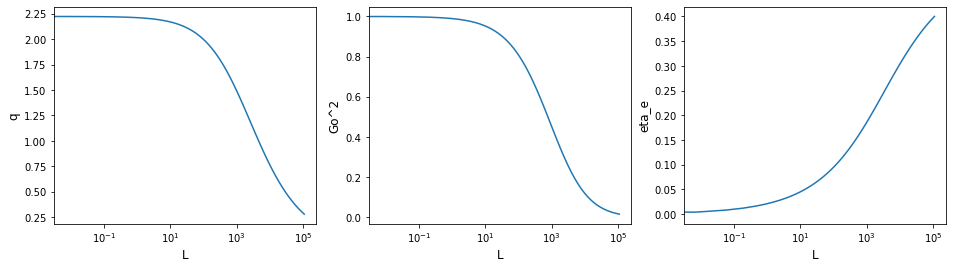

In [37]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(L,q)
plt.xscale('log')
plt.ylabel('q', fontsize = 12)
plt.xlabel('L', fontsize = 12)

plt.subplot(1,3,2)
plt.plot(L,G2)
plt.xscale('log')
plt.ylabel('Go^2', fontsize = 12)
plt.xlabel('L', fontsize = 12)

plt.subplot(1,3,3)
plt.plot(L,Ne)
plt.xscale('log')
plt.ylabel('eta_e', fontsize = 12)
plt.xlabel('L', fontsize = 12)

#plt.tight_layout()

In [44]:
# variation of G over the length of the estuary
L = 1000 #m 
#linearly interpolate to get Ne (curve looks very lienar around L=1000 m )
Ne6 = -1*((999.3288761854907-1000)/(1085.5780157068166-999.3288761854907))*(Ne[L.index(1085.5780157068166)]-Ne[L.index(999.3288761854907)])+Ne[L.index(999.3288761854907)]
Ne6

0.18589002514466807

(-1.0, 1.0)

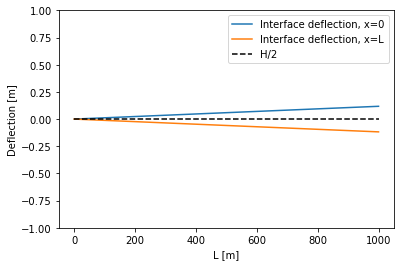

In [98]:
# #interface deflection at either end
# L = np.arange(0,1000.1,0.1)
# Ne = (9/8)*(f/H)*(Go2/(1-Go2))*L
# #Ne = (9/8)*(f/H)*(Go2)*L

# plt.plot(L,Ne, label='Interface deflection, x=0')
# plt.plot(L,-Ne, label='Interface deflection, x=L')
# # plt.plot([0,1000],[5,5],'k',label='Boundaries')
# # plt.plot([0,1000],[-5,-5],'k')
# plt.plot([0,1000],[0,0],'k--',label='H/2')
# plt.legend()
# plt.xlabel('L [m]')
# plt.ylabel('Deflection [m]')
# plt.ylim(-1,1)

In [45]:
Go2 = 16*((1/2-Ne6)**3 * (1/2+Ne6)**3)/((1/2-Ne6)**3 + (1/2+Ne6)**3) 
q = math.sqrt(Go2*g_*(H**3)/16)

(0.0, 10.0)

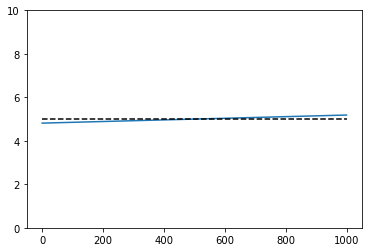

In [59]:
#interface slope is constant
y2 = np.linspace((H/2)-Ne6, (H/2)+Ne6,100)
L = np.linspace(0,1000,100)

plt.plot(L,y2)
plt.plot([0,500,1000],[5,5,5],'k--')
plt.ylim(0,10)#interface slope is constant

In [62]:
#Check - should equal 1 on sides
N = np.linspace(-Ne6, Ne6,100)
G2 = [(Go2)/(16*(1/2-n)**3)+(Go2)/(16*(1/2+n)**3) for n in N]

Text(0, 0.5, 'G^2')

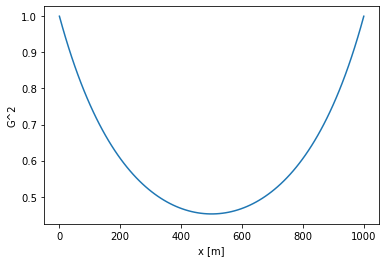

In [63]:
plt.plot(L,G2)
plt.xlabel('x [m]')
plt.ylabel('G^2')